# Problema 1:

Los siguientes datos

In [10]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [52]:
import sympy
import numpy as np

data = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])

In [53]:
import numpy as np
from scipy.optimize import minimize
# Función de log-verosimilitud
def log_likelihood(params):
    a, b = params
    # Evitar valores no definidos
    if a <= 0:
        return np.inf
    # Calcular la densidad
    pdf = (1 / (2 * np.pi)) * (1 + np.cos(data / a - b))
    # Verosimilitud: Evitar log(0)
    log_pdf = np.log(pdf + 1e-9)  # Se suma 1e-9 para evitar valores de log indefinidos
    return -np.sum(log_pdf)  # Negativo porque scipy.minimize busca mínimos

# Valores iniciales para a y b
initial_guess = [1, 0]

# Optimización
result = minimize(log_likelihood, initial_guess, method='Nelder-Mead')

# Resultados
a_hat, b_hat = result.x
print("Estimación de a:", a_hat)
print("Estimación de b:", b_hat)

Estimación de a: 0.7928690803719871
Estimación de b: 1.1638940028614486


In [62]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize._numdiff import approx_derivative

# Función de log-verosimilitud
def log_likelihood(params):
    a, b = params
    if a <= 0:  # Para evitar log de valores no definidos
        return np.inf
    pdf = (1 / (2 * np.pi)) * (1 + np.cos(data / a - b))
    log_pdf = np.log(pdf + 1e-9)
    return -np.sum(log_pdf)  # Negativo porque buscamos maximizar

# Valores iniciales para a y b
initial_guess = [1, 0]

# Optimización
result = minimize(log_likelihood, initial_guess, method='Nelder-Mead')

# Estimaciones óptimas
a_hat, b_hat = result.x
print("Estimación de a:", a_hat)
print("Estimación de b:", b_hat)

# Calcular el hessiano numérico
def hessian(func, params):
    return approx_derivative(
        lambda p: approx_derivative(func, p),
        params,
        
    )

# Obtener el hessiano en el óptimo
hess = hessian(log_likelihood, result.x)

# Matriz de covarianza (inversa del hessiano)
cov_matrix = np.linalg.inv(hess)

# Desviaciones estándar
std_errors = np.sqrt(np.diag(cov_matrix))

# Intervalos de confianza del 95%
z = norm.ppf(0.975)  # Valor z para el 95%
ci_a = (a_hat - z * std_errors[0], a_hat + z * std_errors[0])
ci_b = (b_hat - z * std_errors[1], b_hat + z * std_errors[1])

print(f"Intervalo de confianza de a (95%): {ci_a}")
print(f"Intervalo de confianza de b (95%): {ci_b}")

Estimación de a: 0.7928690803719871
Estimación de b: 1.1638940028614486
Intervalo de confianza de a (95%): (0.7402208545158847, 0.8455173062280895)
Intervalo de confianza de b (95%): (0.886559802936494, 1.4412282027864034)


# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

In [67]:
import numpy as np
from scipy.stats import t

# Datos
data = np.array([
    3.8058516, 4.19437519, 1.37709166, 0.77009889, 5.20968912,
    0.65358179, 3.9701773, 2.07495512, 3.02571317, 3.1321825,
    3.10005197, 4.94755324, 2.26160675, 0.59817735, 1.19183984,
    1.37467926, -0.61701765, 5.01024433, 3.13300185, 5.2957513,
    5.49070323, -1.13532482, -0.34934039, 5.72120588, 1.23276086,
    4.33202401, 4.00250539, -0.40665993, 1.05709082, 3.68821387,
    1.12295318, 2.10739471, 0.53197551, -0.27389039, 1.48139076,
    0.70014346, 2.31649553, 2.44322569, 3.86141784, 2.04558533,
    2.98230541, 3.69456416, 2.35192256, 0.11488102, 1.24948211,
    2.34006925, 1.45962495, -0.09042347, -0.05130358, 1.15963357,
    0.56871108, 2.70715761, 2.47673624, 1.70400014, 1.60709535,
    -0.40534576, 3.07910114, 0.80967033, 5.04007949, 0.11755631,
    1.427098, -0.07170736, 5.11381387, 3.54324208, 4.39654794,
    0.10687046, 2.89288521, 4.23476606, 1.54499074, 2.68598353,
    -1.02087514, 1.9960533, 5.24364406, 3.2185187, -0.38242978,
    3.49462381, 1.06077727, -0.02623431, 3.92295454, 1.48746264,
    2.74412523, -0.29060423, 3.915251, 3.13072888, 3.78471126,
    -0.26904523, 0.66725871, 2.75931047, 2.09460576, 1.15288733,
    3.08004069, 2.51581013, 1.88470954, 3.18040196, 0.85962888,
    -0.2126045, 3.2505909, 2.7800464, 1.41144019, 2.71715232
])

# Tamaño de la muestra
N = len(data)

#alpha
alpha=0.05

# Media muestral
mean = np.mean(data)

# Desviación estándar muestral
std_dev = np.std(data, ddof=1)

# Error estándar
SE = std_dev / np.sqrt(N)

# Valor crítico de t para un IC del 95% y N-1 grados de libertad
t_critical = t.ppf(1-alpha/2, df=n-1)
# Intervalo de confianza
lower_bound = mean - t_critical * SE
upper_bound = mean + t_critical * SE

print(f"Media muestral: {mean:.4f}")
print(f"Intervalo de confianza del 95%: ({lower_bound:.4f}, {upper_bound:.4f})")


Media muestral: 2.1342
Intervalo de confianza del 95%: (1.7984, 2.4700)


# Problema 3:
Un fabricante farmacéutico compra materias primas de dos proveedores diferentes. El nivel medio de impurezas es aproximadamente el mismo para ambos proveedores, pero el fabricante está preocupado por la variabilidad en la cantidad de impurezas de entre un embarque y otro. Si el nivel de impurezas tiende a variar en forma excesiva de una fuente de abastecimiento, esto podría afectar la calidad del producto final. Para comparar la variación en el porcentaje de impurezas para los dos proveedores, el fabricante selecciona diez envíos de cada uno de ellos y mide el porcentaje de impurezas de cada envío. Las varianzas muestrales fueron s2 1 = .273 y s2 2 = .094 respectivamente. Forme un intervalo de confianza de 95% para la relación entre las varianzas poblacionales reales.

In [42]:
from scipy.stats import f

# Datos
s1_squared = 0.273
s2_squared = 0.094
n1 = n2 = 10

# Grados de libertad
df1 = n1 - 1
df2 = n2 - 1

# Razón de varianzas
ratio_var = s1_squared / s2_squared

# Valores críticos de F
alpha = 0.05
F_upper = f.ppf(1 - alpha / 2, df1, df2)
F_lower = f.ppf (alpha / 2, df1, df2)

# Intervalo de confianza
IC_lower = ratio_var / F_upper
IC_upper = ratio_var / F_lower

print(f"Intervalo de confianza del 95% para la razón de varianzas poblacionales: ({IC_lower:.4f}, {IC_upper:.4f})")


Intervalo de confianza del 95% para la razón de varianzas poblacionales: (0.7214, 11.6925)


Notemos que los datos no son suficientes para afirmar con un 95% de confianza que las varianzas son distintas

# Problema 4:
Una encuesta a 415 ejecutivos corporativos, de gobierno y contadores de la Financial Accounting Foundation encontró que 278 consideraban el flujo de caja (lo contrario de ganancias por acción, etc.) como el indicador más importante de la salud financiera de una compañía. Suponga que estos 415 ejecutivos constituyen una muestra aleatoria de la población de todos los ejecutivos. Use los datos para hallar un intervalo de confianza de 95% para la fracción de todos los ejecutivos corporativos que consideran que el flujo de caja es la medida más importante de la salud financiera de una compañía.

In [57]:
import math
from scipy.stats import norm
alpha=0.05

n = 415
x = 278

Z = norm.ppf(1-alpha/2,0,1)  # Valor crítico para un nivel de confianza del 95%
# Proporción muestral
p_hat = x / n

# Error estándar
SE = math.sqrt(p_hat * (1 - p_hat) / n)

# Intervalo de confianza
L_inf = p_hat - Z * SE
L_sup = p_hat + Z * SE

print(f"Proporción muestral: {p_hat:.4f}")
print(f"Intervalo de confianza del 95%: ({L_inf:.4f}, {L_sup:.4f})")


Proporción muestral: 0.6699
Intervalo de confianza del 95%: (0.6246, 0.7151)


# Problema 5:
Se sabe que la probabilidad p de obtener una cara al lanzar al aire una moneda desbalanceada es 1/ 4 o 3/ 4. La moneda es lanzada dos veces al aire y se observa un valor para Y, el número de caras. Para cada valor posible de Y, ¿cuál de los dos valores para p (1/ 4 o 3/ 4) maximiza la probabilidad de que Y = y? Dependiendo del valor de y observado realmente, En otras palabras ¿cuál es el MLE de p?

In [6]:
from math import comb

# Probabilidades posibles para p
p1 = 1/4
p2 = 3/4

# Valores de Y
n = 2
results = []

for y in range(n+1):
    # Probabilidades para p1 y p2
    P_y_p1 = comb(n, y) * (p1**y) * ((1-p1)**(n-y))
    P_y_p2 = comb(n, y) * (p2**y) * ((1-p2)**(n-y))
    
    # Determinar cuál p maximiza la probabilidad
    mle_p = p1 if P_y_p1 > P_y_p2 else p2
    results.append((y, P_y_p1, P_y_p2, mle_p))

# Mostrar resultados
print("Y\tP(Y|p=1/4)\tP(Y|p=3/4)\tMLE(p)")
for y, P_y_p1, P_y_p2, mle_p in results:
    if P_y_p1 == P_y_p2:
        print(f"{y}\t{P_y_p1:.4f}\t\t{P_y_p2:.4f}\t\t0.25 o 0.75")    
    else:
        print(f"{y}\t{P_y_p1:.4f}\t\t{P_y_p2:.4f}\t\t{mle_p:.2f}")


Y	P(Y|p=1/4)	P(Y|p=3/4)	MLE(p)
0	0.5625		0.0625		0.25
1	0.3750		0.3750		0.25 o 0.75
2	0.0625		0.5625		0.75


# Problema 6:
Un examen de lectura se aplica a alumnos de sexto año en tres grandes escuelas primarias. Se considera que las calificaciones del examen en cada escuela tienen distribuciones normales con medias desconocidas $\mu_1, \mu_2, \mu_3$, respectivamente, y varianza común desconocida $\sigma^2(\sigma²_1 = \sigma²_2 = \sigma^2_3 = \sigma^2)$. Usando los datos de la tabla siguiente en muestras aleatorias independientes de cada escuela, pruebe si existe evidencia de una diferencia entre m1 y m2. Use a = .05.

Escuela I : $n_{1} = 10, \sum x_{i}^{2} = 36950 , \bar{x}= 60$
Escuela II : $n_{2} = 10, \sum y_{i}^{2} = 25850 , \bar{y}= 50$
Escuela III : $n_{3} = 10, \sum w_{i}^{2} = 49900 , \bar{x}= 70$


In [54]:
#H0 : M1 - M2 = D
#H1 : M1 - M2 diferente de D
#D=0
D=0
import math
from scipy.stats import t

# Datos proporcionados
n1, n2, n3 = 10, 10, 10
x1_mean, x2_mean, x3_mean = 60, 50, 70
x1_sq_sum, x2_sq_sum, x3_sq_sum = 36950, 25850, 49900

# Varianzas muestrales
s1_sq = (x1_sq_sum - n1 * x1_mean**2) / (n1 - 1)
s2_sq = (x2_sq_sum - n2 * x2_mean**2) / (n2 - 1)
s3_sq = (x3_sq_sum - n3 * x3_mean**2) / (n3 - 1)

# Varianza común
S_sq = math.sqrt(((n1 - 1) * s1_sq + (n2 - 1) * s2_sq + (n3 - 1) * s3_sq) / (n1 + n2 + n3 - 3))

# Estadístico t
t_stat = (x1_mean - x2_mean-D) / (S_sq*math.sqrt(1/n1 + 1/n2))

# Grados de libertad y valor crítico
df = n1 + n2 + n3 - 3
alpha=0.05

t_crit = t.ppf(1 - alpha/2, df)  # Prueba bilateral

# Resultado
reject_null = abs(t_stat) > t_crit

# Mostrar resultados
print(f"s1^2 = {s1_sq:.4f}, s2^2 = {s2_sq:.4f}, s3^2 = {s3_sq:.4f}")
print(f"S^2 (varianza común) = {S_sq:.4f}")
print(f"t estadístico = {t_stat:.4f}")
print(f"t crítico = {t_crit:.4f}")
print("¿Rechazar H0?", "Como el estadistico", t_stat ,"es mayor que",t_crit,"Se rechaza H0 en favor de la alternativa" if reject_null else "No hay suficiente evidencia para rechazar H0")


s1^2 = 105.5556, s2^2 = 94.4444, s3^2 = 100.0000
S^2 (varianza común) = 10.0000
t estadístico = 2.2361
t crítico = 2.0518
¿Rechazar H0? Como el estadistico 2.23606797749979 es mayor que 2.0518305164802833 Se rechaza H0 en favor de la alternativa


# Problema 7:
¿Qué eficiencia de combustión debe esperar el propietario de una casa de un horno de petróleo? La EPA indica que 80% o más es excelente, 75% a 79% es buena, 70% a 74% es regular y debajo de 70% es mala. Un contratista de sistemas de calefacción doméstica, que vende dos marcas de calentadores de petróleo (llamémosles A y B) decidió comparar sus eficiencias medias al analizar las eficiencias de 8 calentadores del tipo A y 6 del tipo B. Los porcentajes de eficiencia resultantes para los 14 calentadores se muestran en la tabla siguiente.

Tipo A 72 78 73 69 75 74 69 75

Tipo B 78 76 81 74 82 75

a ¿Los datos proporcionan suficiente evidencia para indicar una diferencia en las eficiencias medias para las dos marcas de calentadores domésticos? Encuentre el valor p aproximado para la prueba e interprete su valor. 

b Determine un intervalo de confianza de 90% para (mA − mB) e interprete el resultado.

In [105]:
import numpy as np
from scipy.stats import t

# Datos
tipo_A = np.array([72, 78, 73, 69, 75, 74, 69, 75])
tipo_B = np.array([78, 76, 81, 74, 82, 75])

# Parámetros muestrales
n_A, n_B = len(tipo_A), len(tipo_B)
xbar_A, xbar_B = np.mean(tipo_A), np.mean(tipo_B)
s2_A, s2_B = np.var(tipo_A, ddof=1), np.var(tipo_B, ddof=1)

# Varianza combinada
S_p2 = np.sqrt(((n_A - 1) * s2_A + (n_B - 1) * s2_B) / (n_A + n_B - 2))

# Estadístico t
t_stat = (xbar_A - xbar_B) / (S_p2 *np.sqrt(1/n_A + 1/n_B))

# Grados de libertad
df = n_A + n_B - 2

# Valor p
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# Intervalo de confianza del 90%
alpha=0.1

t_crit = t.ppf(1 - alpha/2, df)  # Nivel de confianza del 90%
margin_error = t_crit * (S_p2 *np.sqrt(1/n_A + 1/n_B))
ci_lower = (xbar_A - xbar_B) - margin_error
ci_upper = (xbar_A - xbar_B) + margin_error

# Resultados
print(f"Media Tipo A: {xbar_A:.2f}, Varianza Tipo A: {s2_A:.2f}")
print(f"Media Tipo B: {xbar_B:.2f}, Varianza Tipo B: {s2_B:.2f}")
print(f"t estadístico: {t_stat:.4f}, p-valor: {p_value:.4f}")
print(f"Intervalo de confianza del 90% para (μA - μB): ({ci_lower:.4f}, {ci_upper:.4f})")


Media Tipo A: 73.12, Varianza Tipo A: 9.55
Media Tipo B: 77.67, Varianza Tipo B: 10.67
t estadístico: -2.6570, p-valor: 0.0209
Intervalo de confianza del 90% para (μA - μB): (-7.5881, -1.4952)


Como el p valor es menor que 0.05 rechazamos H0 indicando que existe una diferencia significativa entre las eficiencias medias de los dos tipos de calentadores


# Problema 8: 
Los datos de la siguiente tabla muestran lecturas en pies-libras de la resistencia al impacto de dos clases de material de empaque, tipo A y tipo B. Determine si la información sugiere una diferencia en la resistencia media entre las dos clases de material. Realice la prueba con un nivel de significancia a = .10.

A     &nbsp; B \
1.25 &nbsp; .89 \
1.16 &nbsp; 1.01 \
1.33 &nbsp; .97 \
1.15 &nbsp; .95 \
1.23 &nbsp; .94 \
1.20 &nbsp; 1.02 \
1.32 &nbsp; .98 \
1.28 &nbsp; 1.06 \
1.21 &nbsp; .98


In [106]:
import numpy as np
from scipy.stats import t

#H0 : M1 - M2= 0
#H1 : M1- M2 distinta 0

# Datos
tipo_A = np.array([1.25,1.16,1.33,1.15,1.23,1.20,1.32,1.28,1.21])
tipo_B = np.array([0.89,1.01,0.97,0.95,0.94,1.02,0.98,1.06,0.98])


# Parámetros muestrales
n_A, n_B = len(tipo_A), len(tipo_B)
xbar_A, xbar_B = np.mean(tipo_A), np.mean(tipo_B)
s2_A, s2_B = np.var(tipo_A, ddof=1), np.var(tipo_B, ddof=1)

# Varianza combinada
S_p2 = np.sqrt(((n_A - 1) * s2_A + (n_B - 1) * s2_B) / (n_A + n_B - 2))

# Estadístico t
t_stat = (xbar_A - xbar_B) / (S_p2 *np.sqrt(1/n_A + 1/n_B))

# Grados de libertad
df = n_A + n_B - 2
# Resultado
reject_null = abs(t_stat) > t_crit
# Nivel de significancia
alpha=0.1
t_crit = t.ppf(1 - alpha/2, df)  # Nivel de confianza del 90%
print(f"t estadístico = {t_stat:.4f}")
print(f"t crítico = {t_crit:.4f}")
print("¿Rechazar H0?", "Como el estadistico", t_stat ,"es mayor que",t_crit,"Se rechaza H0 en favor de la alternativa" if reject_null else "No hay suficiente evidencia para rechazar H0")

t estadístico = 9.5641
t crítico = 1.7459
¿Rechazar H0? Como el estadistico 9.564131954889964 es mayor que 1.74588367627624 Se rechaza H0 en favor de la alternativa


# Problema 9:
Los datos de la siguiente tabla proporcionan las millas por galón recorridas por un automóvil de prueba cuando utiliza gasolinas de niveles variables de octanaje.

Millas por galón (y) &nbsp; Octano (x) \
13.0 &nbsp;89 \
13.2 &nbsp;93 \
13.0 &nbsp;87 \
 13.6 &nbsp;90 \
13.3 &nbsp;89 \
 13.8 &nbsp;95  \
 14.1 &nbsp;100 \
 14.0 &nbsp;98

 a Calcule el valor de r. 
 
 b ¿Los datos dan suficiente evidencia para indicar que el nivel de octanaje y las millas por galón son dependientes? Obtenga el nivel de significancia alcanzado, e indique su conclusión si desea realizar una prueba en el nivel de a = .05.

In [107]:
import numpy as np
from scipy.stats import t

#H0: son independientes
#H1 hay dependencia

# Datos
x = np.array([89, 93, 87, 90, 89, 95, 100, 98])  # Nivel de octano
y = np.array([13.0, 13.2, 13.0, 13.6, 13.3, 13.8, 14.1, 14.0])  # Millas por galón

# Medias
x_mean = np.mean(x)
y_mean = np.mean(y)

# Cálculo del coeficiente de correlación r
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
r = numerator / denominator

# Estadístico t
n = len(x)
t_stat = r * np.sqrt((n - 2) / (1 - r**2))

# Grados de libertad
df = n - 2

# Valor p para una prueba bilateral
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

#nivel de significancia 
alpha=0.05
t_crit = t.ppf(1 - alpha/2, df)  # Nivel de confianza del 95%

# Resultados
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"t crítico = {t_crit:.4f}")
print(f"Valor p: {p_value:.4f}")
print("¿Rechazar H0?", "Como el estadistico", t_stat ,"es mayor que",t_crit,"Se rechaza H0 en favor de la alternativa" if reject_null else "No hay suficiente evidencia para rechazar H0")


Coeficiente de correlación (r): 0.8914
Estadístico t: 4.8178
t crítico = 2.4469
Valor p: 0.0029
¿Rechazar H0? Como el estadistico 4.817770069955905 es mayor que 2.4469118487916806 Se rechaza H0 en favor de la alternativa


Hay suficiente evidencia para afirmar que el nivel de octanaje y las millas por galón son dependientes.

# Problema 10:
Se realizó un experimento para determinar el efecto de presión y temperatura en el rendimiento de una sustancia química. Se emplearon dos niveles de presión (en libras por pulgada cuadrada, psi) y tres de temperatura:

Presión: 50 , 80
Temperatura (F) : 100, 200, 300

Una prueba del experimento en cada combinación de temperatura-presión dio como resultado los datos que aparecen en la siguiente tabla.

Rendimiento &nbsp; Presión &nbsp; Temperatura\
21 &nbsp;50&nbsp; 100 \
23 &nbsp;50 &nbsp;200 \
26 &nbsp;50 &nbsp;300 \
22 &nbsp;80 &nbsp;100 \
23 &nbsp;80 &nbsp;200 \
28 &nbsp;80&nbsp; 300

a Ajuste el modelo $Y = \beta_{0} +\beta_1x_1 +\beta_2x_2 +\beta_3x_2^{2} + \epsilon$, donde $x_1$ = presión y $x_2$ = temperatura. 

b Compruebe si $\beta_3$ difiere considerablemente de cero, con $\alpha$ = .05. 

c Pruebe la hipótesis de que la temperatura no afecta el rendimiento, con $\alpha$ = .05.

In [108]:
import numpy as np

# Datos
Y = np.array([21, 23, 26, 22, 23, 28])  # Rendimiento
X = np.array([
    [1, 50, 100, 100**2],
    [1, 50, 200, 200**2],
    [1, 50, 300, 300**2],
    [1, 80, 100, 100**2],
    [1, 80, 200, 200**2],
    [1, 80, 300, 300**2],
])

# Estimación de beta
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y

print(f"Coeficientes estimados (beta): {beta_hat}")


Coeficientes estimados (beta): [ 2.03333333e+01  3.33333333e-02 -2.25000000e-02  1.25000000e-04]


In [113]:
import numpy as np
from scipy.stats import t

# Datos
Y = np.array([21, 23, 26, 22, 23, 28])  # Rendimiento
X = np.array([
    [1, 50, 100, 100**2],
    [1, 50, 200, 200**2],
    [1, 50, 300, 300**2],
    [1, 80, 100, 100**2],
    [1, 80, 200, 200**2],
    [1, 80, 300, 300**2],
])

# Estimación de beta
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y

# Residuales y estimación de sigma^2
Y_hat = X @ beta_hat
residuals = Y - Y_hat
sigma_squared = np.sum(residuals**2) / (len(Y) - X.shape[1])

# Matriz de varianza de beta
var_beta = sigma_squared * np.linalg.inv(X_transpose @ X)

# Vector a para probar si beta3 son 0
a = np.array([0, 0, 0, 1])

# Cálculo del estadístico t
numerador = a.T @ beta_hat
denominador = np.sqrt(a.T @ var_beta @ a)
t_stat = numerador / denominador

# Grados de libertad y p-valor
df = len(Y) - X.shape[1]
alpha=0.05
t_crit = t.ppf(1 - alpha/2, df)  # Nivel de confianza del 95%

p_value = 2 * (1 - t.cdf(abs(t_stat), df=df))
# Resultado

print(f"t-stat: {t_stat:.4f}")
print(f"t-crit: {t_crit:.4f}")
print(f"p-value: {p_value:.4f}")
print("¿Rechazar H0? " "No hay suficiente evidencia para rechazar H0, por lo que no podemos afirmar que beta3 \ndifiera considerablemente de 0")


t-stat: 2.0412
t-crit: 4.3027
p-value: 0.1780
¿Rechazar H0? No hay suficiente evidencia para rechazar H0, por lo que no podemos afirmar que beta3 
difiera considerablemente de 0


In [163]:
import numpy as np
from scipy.stats import f

# Datos del problema
Y = np.array([21, 23, 26, 22, 23, 28])  # Rendimientos
X_full = np.array([
    [1, 50, 100, 100**2],  # Modelo completo
    [1, 50, 200, 200**2],
    [1, 50, 300, 300**2],
    [1, 80, 100, 100**2],
    [1, 80, 200, 200**2],
    [1, 80, 300, 300**2],
])

# Modelo restringido (sin temperatura)
X_restricted = np.array([
    [1, 50],  # Solo intercepto y presión
    [1, 50],
    [1, 50],
    [1, 80],
    [1, 80],
    [1, 80],
])

# Ajuste de ambos modelos
beta_full = np.linalg.inv(X_full.T @ X_full) @ X_full.T @ Y
beta_restricted = np.linalg.inv(X_restricted.T @ X_restricted) @ X_restricted.T @ Y

# Predicciones
Y_hat_full = X_full @ beta_full
Y_hat_restricted = X_restricted @ beta_restricted

# Sumas de cuadrados
SSR_restricted = np.sum((Y - Y_hat_restricted)**2)  # Suma de cuadrados del modelo restringido
SSR_full = np.sum((Y - Y_hat_full)**2)  # Suma de cuadrados del modelo completo

# Grados de libertad
n = len(Y)  # Número de observaciones
p_full = X_full.shape[1]  # Número de parámetros en el modelo completo
p_restricted = X_restricted.shape[1]  # Número de parámetros en el modelo restringido
q = p_full - p_restricted  # Número de restricciones
df_error = n - p_full  # Grados de libertad residuales del modelo completo

# Estadístico F
F_stat = ((SSR_restricted - SSR_full) / q) / (SSR_full / df_error)

# p-valor
p_value = 1 - f.cdf(F_stat, dfn=q, dfd=df_error)

print(f"Estadístico F: {F_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: La temperatura afecta significativamente el rendimiento.")
else:
    print("No podemos rechazar H0: No hay evidencia suficiente para decir que la temperatura afecta el rendimiento.")


Estadístico F: 32.3333
p-valor: 0.0300
Rechazamos H0: La temperatura afecta significativamente el rendimiento.


# Problema 11:
Los datos de la siguiente tabla provienen de la comparación de los porcentajes de crecimiento para bacterias tipos A y B. El crecimiento Y registrado en cinco puntos igualmente espaciados (y codificados) de tiempo se muestra en la tabla.

Tiempo codificado : -2, -1, 0 , 1, 2 \
Bacteria A : 8.0, 9.0, 9.1 , 10.2, 10.4\
Bacteria B : 10.0, 10.3, 12.2, 12.6, 13.9

a Ajuste el modelo lineal $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$ a los n = 10 puntos. Sea $x_1$ = 1 si el punto se refiere a bacterias tipo B y sea $x_1$ = 0 si el punto se refiere al tipo A. Sea $x_2$ = tiempo codificado. 

b Grafique los puntos y las dos rectas de crecimiento. Observe que b3 es la diferencia entre las pendientes de las dos rectas y representa la interacción tiempo-bacteria. 

c Prediga el crecimiento del tipo A en el tiempo $x_2$ = 0 y compare la respuesta con la gráfica. Repita el proceso para el tipo B.

d ¿Los datos presentan suficiente evidencia para indicar una diferencia en los porcentajes de crecimiento para los dos tipos de bacteria?

In [160]:
import numpy as np
import pandas as pd

# Datos
y = np.array([8.0, 9.0, 9.1, 10.2, 10.4, 10.0, 10.3, 12.2, 12.6, 13.9])  # Vector de observaciones
x2 = np.array([-2, -1, 0, 1, 2, -2, -1, 0, 1, 2])  # Tiempo codificado
x1 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Indicador para Bacteria B
x1_x2 = x1 * x2  # Interacción entre x1 y x2

# Matriz de diseño
X = np.column_stack((np.ones(len(y)), x1, x2, x1_x2))  # Incluye término constante
Y = y.reshape(-1, 1)  # Vector columna de observaciones

# Cálculo de beta_hat (estimadores de los coeficientes)
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y

# Cálculo de errores estándar
y_pred = X @ beta_hat  # Predicciones
residuals = Y - y_pred
n, p = X.shape
sigma_squared = (residuals.T @ residuals) / (n - p)
var_beta_hat = sigma_squared * np.linalg.inv(X_transpose @ X)

# Imprimimos resultados
print("Coeficientes estimados (beta_hat):")
print(beta_hat.flatten())

print("\nVarianza de los coeficientes:")
print(np.diag(var_beta_hat).flatten())

# Parámetros estimados:
beta_0, beta_1, beta_2, beta_3 = beta_hat.flatten()


Coeficientes estimados (beta_hat):
[9.34 2.46 0.6  0.41]

Varianza de los coeficientes:
[0.02436667 0.04873333 0.01218333 0.02436667]


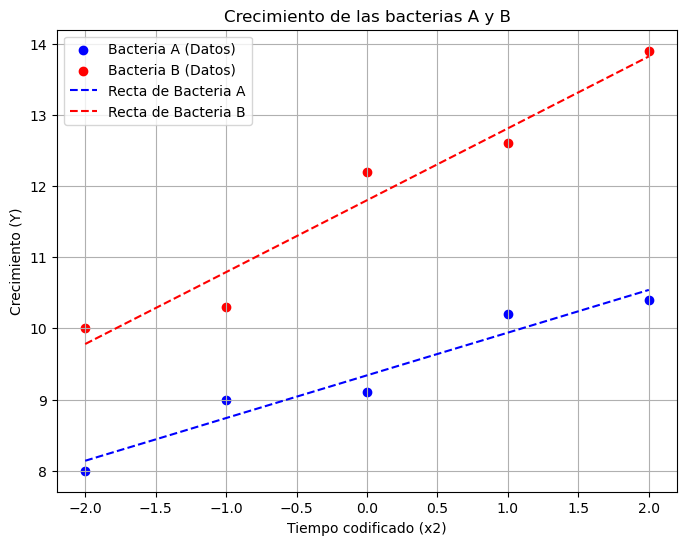

In [164]:
import matplotlib.pyplot as plt

# Valores para el tiempo
x2_range = np.linspace(-2, 2, 100)

# Rectas de crecimiento
y_a = beta_0 + beta_2 * x2_range  # Bacteria A (x1 = 0)
y_b = (beta_0 + beta_1) + (beta_2 + beta_3) * x2_range  # Bacteria B (x1 = 1)

# Gráfica
plt.figure(figsize=(8, 6))
plt.scatter(x2[:5], y[:5], color='blue', label='Bacteria A (Datos)')
plt.scatter(x2[5:], y[5:], color='red', label='Bacteria B (Datos)')
plt.plot(x2_range, y_a, color='blue', linestyle='--', label='Recta de Bacteria A')
plt.plot(x2_range, y_b, color='red', linestyle='--', label='Recta de Bacteria B')

plt.xlabel('Tiempo codificado (x2)')
plt.ylabel('Crecimiento (Y)')
plt.title('Crecimiento de las bacterias A y B')
plt.legend()
plt.grid(True)
plt.show()


Predicción para Bacteria A en x2 = 0: 9.34
El valor para Bacteria A en x2 = 0: 9.1
Predicción para Bacteria B en x2 = 0: 11.8
El valor para Bacteria B en x2 = 0: 12.2


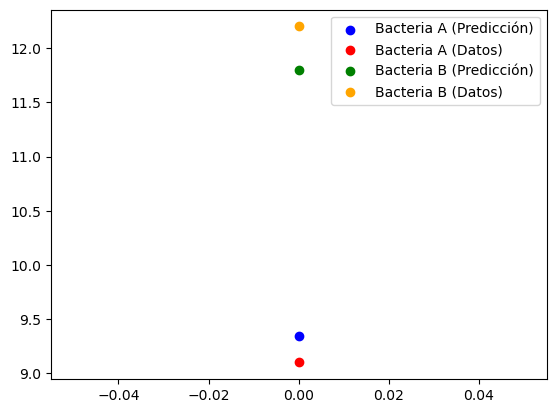

In [177]:
# Predicción para Bacteria A (x1 = 0, x2 = 0)
y_pred_a = beta_0

# Predicción para Bacteria B (x1 = 1, x2 = 0)
y_pred_b = beta_0 + beta_1

print("Predicción para Bacteria A en x2 = 0:", y_pred_a)
print("El valor para Bacteria A en x2 = 0:", y[2])
print("Predicción para Bacteria B en x2 = 0:", y_pred_b)
print("El valor para Bacteria B en x2 = 0:", y[7])

plt.scatter(0, y_pred_a, color='blue', label='Bacteria A (Predicción)')
plt.scatter(0, y[2], color='red', label='Bacteria A (Datos)')
plt.scatter(0, y_pred_b, color='green', label='Bacteria B (Predicción)')
plt.scatter(0, y[7], color='orange', label='Bacteria B (Datos)')
plt.legend()

In [1]:
import numpy as np
from scipy.stats import t

# Datos
y = np.array([8.0, 9.0, 9.1, 10.2, 10.4, 10.0, 10.3, 12.2, 12.6, 13.9])  # Vector de observaciones
x2 = np.array([-2, -1, 0, 1, 2, -2, -1, 0, 1, 2])  # Tiempo codificado
x1 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Indicador para Bacteria B
x1_x2 = x1 * x2  # Interacción entre x1 y x2

# Matriz de diseño
X = np.column_stack((np.ones(len(y)), x1, x2, x1_x2))  # Incluye término constante

# Estimación de beta
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

# Residuales y estimación de sigma^2
y_hat = X @ beta_hat
residuals = y - y_hat
sigma_squared = np.sum(residuals**2) / (len(y) - X.shape[1])

# Matriz de varianza de beta
var_beta = sigma_squared * np.linalg.inv(X_transpose @ X)

# Vector a para probar si beta3 es 0
a = np.array([0, 0, 0, 1])  # Selecciona el coeficiente de interacción x1_x2

# Cálculo del estadístico t
numerador = a.T @ beta_hat
denominador = np.sqrt(a.T @ var_beta @ a)
t_stat = numerador / denominador

# Grados de libertad y valor crítico
df = len(y) - X.shape[1]
alpha = 0.05
t_crit = t.ppf(1 - alpha / 2, df)  # Nivel de confianza del 95%

# Valor p
p_value = 2 * (1 - t.cdf(abs(t_stat), df=df))

# Resultados
print(f"Estimación de beta: {beta_hat}")
print(f"Varianza de beta: \n{var_beta}")
print(f"t-stat: {t_stat:.4f}")
print(f"t-crit: {t_crit:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretación
if abs(t_stat) > t_crit:
    print("Se rechaza la hipótesis nula: el parámetro beta3 es significativo, por lo que hay una diferencia en el crecimiento de las bacterias")
else:
    print("No se rechaza la hipótesis nula: el parámetro beta3 no es significativo, por lo que, no podemos afirmar una diferencia en el crecimiento de las bacterias")


Estimación de beta: [9.34 2.46 0.6  0.41]
Varianza de beta: 
[[ 0.02436667 -0.02436667  0.          0.        ]
 [-0.02436667  0.04873333  0.          0.        ]
 [ 0.          0.          0.01218333 -0.01218333]
 [ 0.          0.         -0.01218333  0.02436667]]
t-stat: 2.6266
t-crit: 2.4469
p-value: 0.0392
Se rechaza la hipótesis nula: el parámetro beta3 es significativo, por lo que hay una diferencia en el crecimiento de las bacterias


# Problema 12:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

In [25]:
import pandas as pd
x=pd.read_csv("datos.csv")
x

,Grupo,Datos
0,Grupo A,5.8
1,Grupo A,3.1
2,Grupo A,7.2
3,Grupo A,2.6
4,Grupo A,6.7
5,Grupo A,4.5
6,Grupo B,1.9
7,Grupo B,8.5
8,Grupo B,4.3
9,Grupo B,6.8


In [26]:
import pandas as pd
from scipy.stats import f_oneway
x=pd.read_csv("datos.csv")
# Separar las calificaciones por grupo
grupo_a = x[x["Grupo"] == "Grupo A"]["Datos"]
grupo_b = x[x["Grupo"] == "Grupo B"]["Datos"]
stat, p_value = f_oneway(grupo_a, grupo_b)
print(f"Estadístico F: {stat}")
print(f"Valor p: {p_value}")

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("Existe una diferencia estadísticamente significativa entre los grupos.")
else:
    print("No se encontró una diferencia estadísticamente significativa entre los grupos.")

Estadístico F: 0.017511360676141122
Valor p: 0.8973476766572029
No se encontró una diferencia estadísticamente significativa entre los grupos.


# Problema 13:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótesis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

In [27]:
import pandas as pd
x=pd.read_csv("datos.csv")
grupo_a = x[x["Grupo"] == "Grupo A"]["Datos"]
grupo_b = x[x["Grupo"] == "Grupo B"]["Datos"]


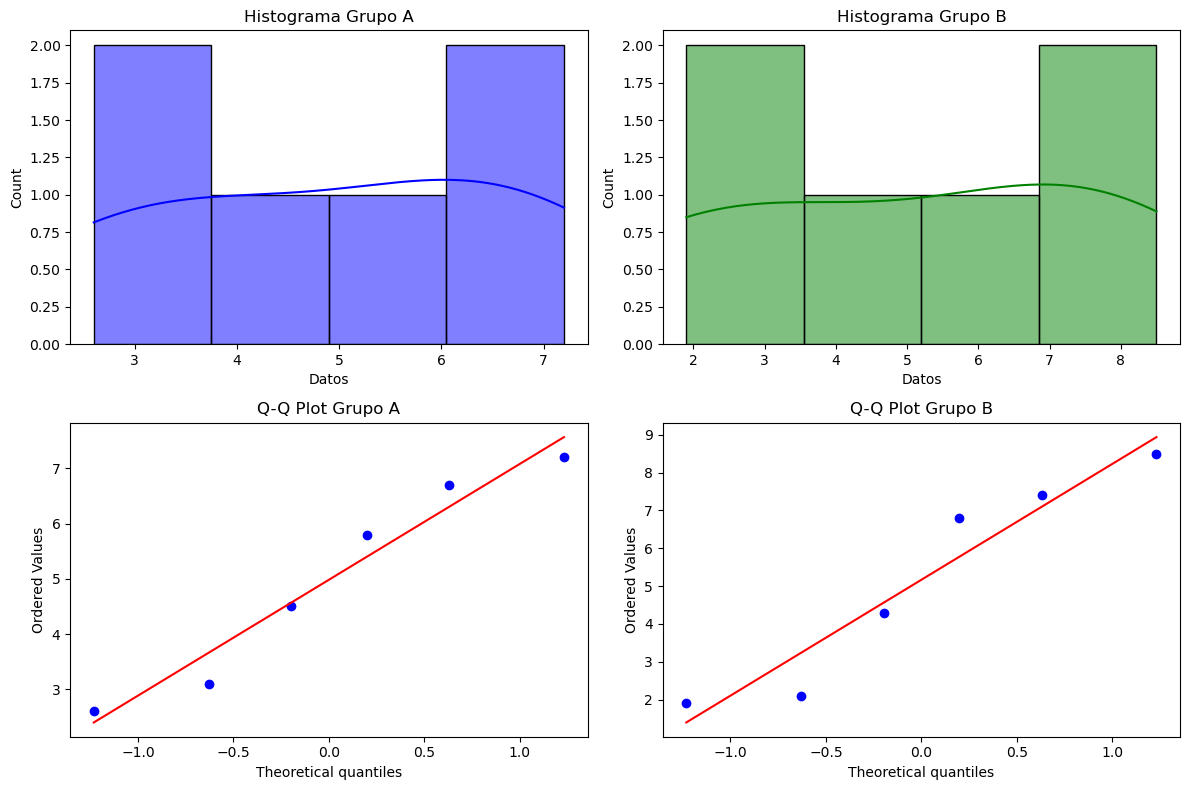

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# a) Pruebas de normalidad
# 1. Prueba gráfica
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(grupo_a, kde=True, ax=axes[0, 0], color="blue").set(title="Histograma Grupo A")
sns.histplot(grupo_b, kde=True, ax=axes[0, 1], color="green").set(title="Histograma Grupo B")

stats.probplot(grupo_a, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot Grupo A")

stats.probplot(grupo_b, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot Grupo B")

plt.tight_layout()
plt.show()

Prueba de Shapiro-Wilk, que evalúa si los datos siguen una distribución normal.

In [32]:
# 2. Prueba de Shapiro-Wilk
stat_a, p_value_a = stats.shapiro(grupo_a)
stat_b, p_value_b = stats.shapiro(grupo_b)

print("Prueba de Shapiro-Wilk:")
print(f"Grupo A: Estadístico = {stat_a}, Valor p = {p_value_a}")
print(f"Grupo B: Estadístico = {stat_b}, Valor p = {p_value_b}")

Prueba de Shapiro-Wilk:
Grupo A: Estadístico = 0.9267435669898987, Valor p = 0.555199146270752
Grupo B: Estadístico = 0.8947597146034241, Valor p = 0.34388166666030884


In [33]:
alpha = 0.05
if p_value_a < alpha:
    print("El Grupo A no sigue una distribución normal.")
else:
    print("El Grupo A sigue una distribución normal.")

if p_value_b < alpha:
    print("El Grupo B no sigue una distribución normal.")
else:
    print("El Grupo B sigue una distribución normal.")

El Grupo A sigue una distribución normal.
El Grupo B sigue una distribución normal.


Usaremos la prueba Mann-Whitney U, la cual es no paramétrica, que compara las medianas de dos grupos independientes.

In [34]:
# b) Prueba de Mann-Whitney U
stat, p_value = stats.mannwhitneyu(grupo_a, grupo_b, alternative="two-sided")
alpha = 0.05
print("\nPrueba de Mann-Whitney U:")
print(f"Estadístico U = {stat}, Valor p = {p_value}")

if p_value < alpha:
    print("Existe una diferencia significativa en la mediana entre los grupos.")
else:
    print("No hay una diferencia significativa en la mediana entre los grupos.")


Prueba de Mann-Whitney U:
Estadístico U = 17.0, Valor p = 0.9372294372294373
No hay una diferencia significativa en la mediana entre los grupos.
